# Edge detection
In this notebook we use `OpenCV` to detect and outline the edges within the loaded image.

## Imports

In [1]:
run -i ../scripts/standardimports

## User Settings

In [2]:
image_path = "../images/empty-boards/empty-1.jpg"

bool_plot = True
bool_save = False

## Setup

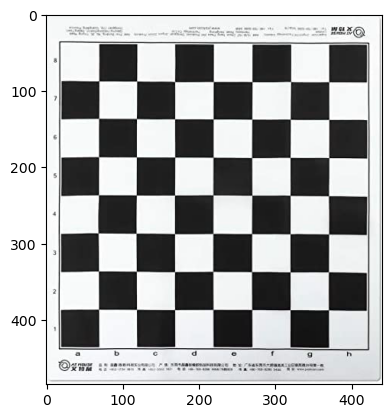

In [3]:
img = cv2.imread(image_path)
plt.imshow(img)

*Note:* Because of `OpenCV`'s weird color order, the picture's colors look a bit different than the original. That's ok though because we're converting to black and white anyways.

## Edge-detection

### Tutorial
In the following I just apply the code from the tutorial https://learnopencv.com/edge-detection-using-opencv/

Text(0.5, 1.0, 'Grayscale')

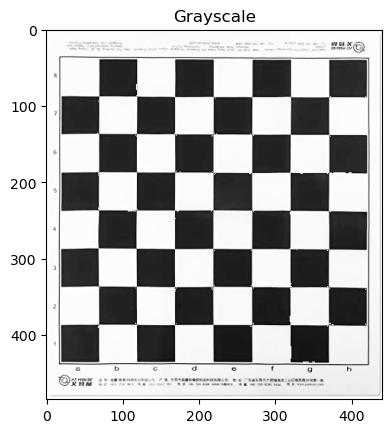

In [4]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plotting
plt.imshow(-img_gray, cmap='Greys') # minus sign because of different colormaps between cv2 and plt
plt.title("Grayscale")

Text(0.5, 1.0, 'Blurred')

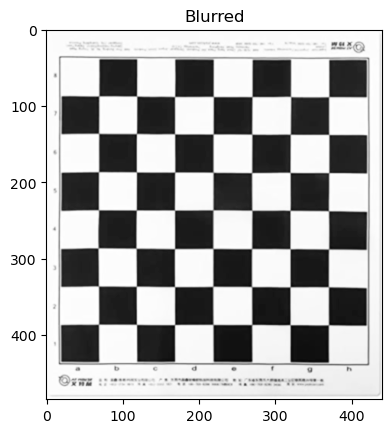

In [5]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# plotting
plt.imshow(-img_blur, cmap='Greys') # minus sign because of different colormaps between cv2 and plt
plt.title("Blurred")

Text(0.5, 1.0, 'edges (x-direction)')

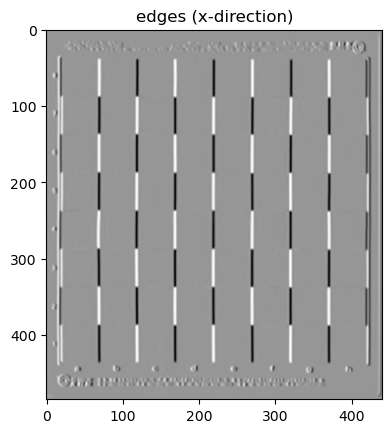

In [6]:
# edges in x-direction
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

# plotting
plt.imshow(sobelx, cmap='Greys') # minus sign because of different colormaps between cv2 and plt
plt.title("edges (x-direction)")

Text(0.5, 1.0, 'edges (y-direction)')

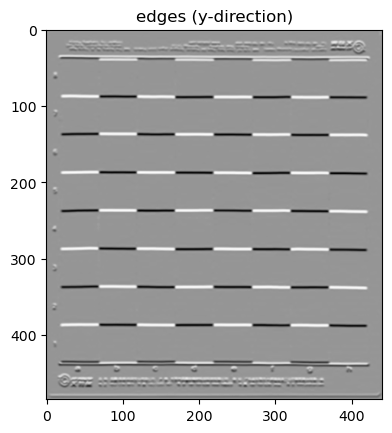

In [7]:
# edges in y-direction
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the X axis

# plotting
plt.imshow(sobely, cmap='Greys') # minus sign because of different colormaps between cv2 and plt
plt.title("edges (y-direction)")

Text(0.5, 1.0, 'edges with Sobel function')

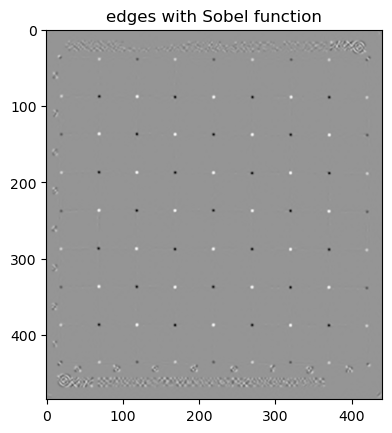

In [8]:
# edges
sobel = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Sobel Edge Detection on the X axis

# plotting
plt.imshow(sobel, cmap='Greys') # minus sign because of different colormaps between cv2 and plt
plt.title("edges with Sobel function")

It's somewhat weird that these are so soft. Maybe it's `matplotlib`?

In [9]:
cv2.imwrite("test.png", sobel)
img_reloaded = cv2.imread("test.png")

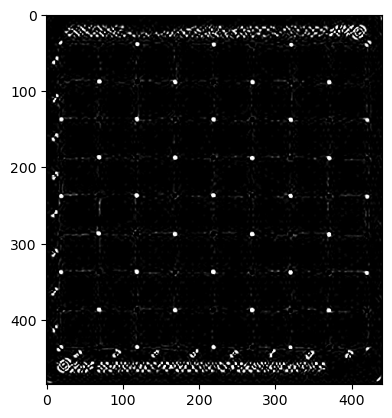

In [10]:
plt.imshow(img_reloaded, cmap='Greys')

Alright, that's somewhat annoying.

In [11]:
# Convert to graycsale
img_gray = cv2.cvtColor(img_reloaded, cv2.COLOR_BGR2GRAY)

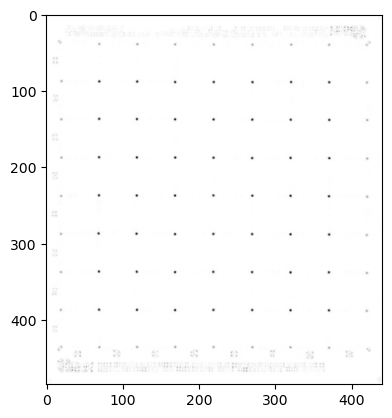

In [12]:
plt.imshow(np.abs(sobel), cmap='Greys')

Text(0.5, 1.0, 'Canny')

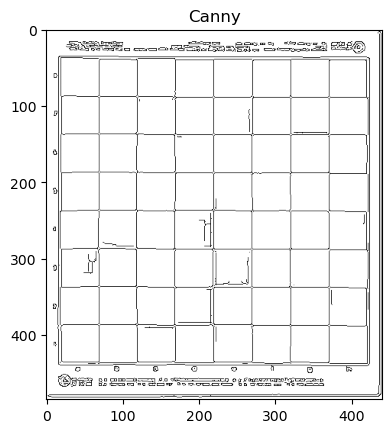

In [13]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=1, threshold2=50) # Canny Edge Detection

# plotting
plt.imshow(edges, cmap='Greys') 
plt.title("Canny")

### Results from first test:
- the `matplotlib` plotting doesn't work great with the `cv2` plotting
- for the test image `empty-4.jpg` the functions `cv2.sobel` and `cv2.canny` give very similar results
- for the test image `empty-1.jpg` the function `cv2.sobel` is pretty much useless, but `cv2.canny` works fine.
- for the other images it was very similar.
It seems like `cv2.canny` is the better way to go. We'll just need to find a good way to figure out how to set those parameters.

## The End.

In [14]:
t_notebook = time.time()-tStart_notebook
print("Runtime of this notebook: {} s = {} min".format(t_notebook, t_notebook / 60))

Runtime of this notebook: 1.6643037796020508 s = 0.027738396326700845 min
